# Fetal Health Classification Project

Cardiotocography (CTG) is a continuous recording of the fetal heart rate and uterine contractions obtained via an ultrasound transducer placed on the mother's abdomen. It allows early-detection of the fetal health.

In this project, I will create a model using what we learned from the ML Bootcamp to classify the fetal's health based on CTG recordings. 

## Table of Contents

1- Libraries Imports

2- Load Data

3- Data Preprocessing

4- Data Analysis

5- Model Building

6- Conclusions

## Libraries Imports

In [109]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, auc, roc_auc_score

np.random.seed(0)

## Load Data

In [110]:
df = pd.read_csv('fetal_health.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [111]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [112]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


## Data Preprocessing

Check if data needs cleaning by using a heat map.
If the heat map is black, there is no NaN values.

<AxesSubplot:>

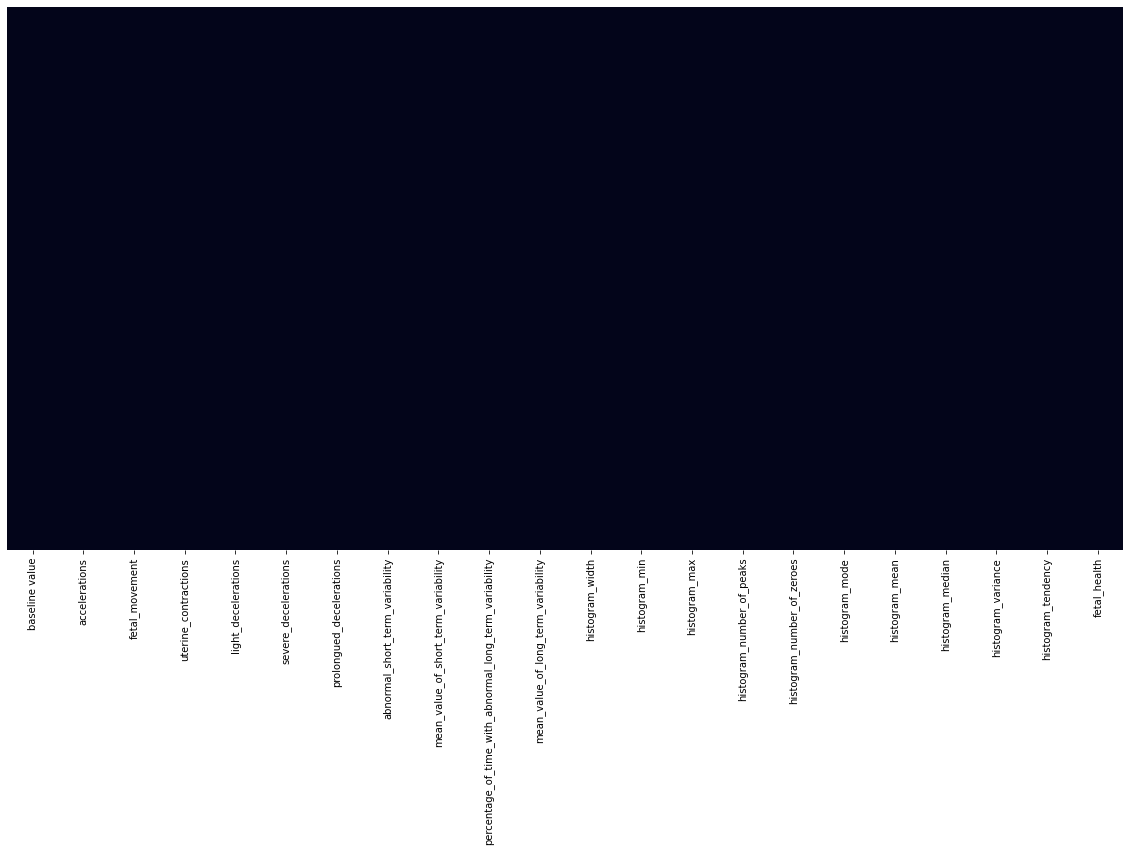

In [113]:
#heat map
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull() , yticklabels=False ,cbar=False)

Further checking

In [114]:
df.isnull().values.any()

False

In [115]:
df.isnull().sum().sum() 

0

So, there are no null data in the dataset

Now, let's check if the data is imbalanced

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

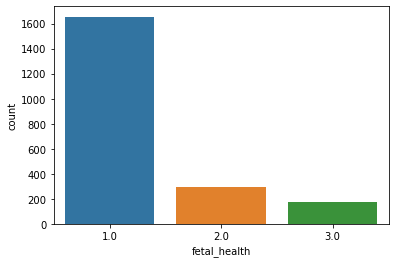

In [116]:
sns.countplot(data= df, x='fetal_health')

The count plot shows that the data is imbalanced. This tends to give misleading accuracy of the classification model.

So, we may use the following measures for better indications:
- confusion matrix
- recall
- precision
- F1 score

Further data preprocessing will be done when I start working on the model.

## Data Analysis

Now, let's check the correlation matrix for data insights.

<AxesSubplot:>

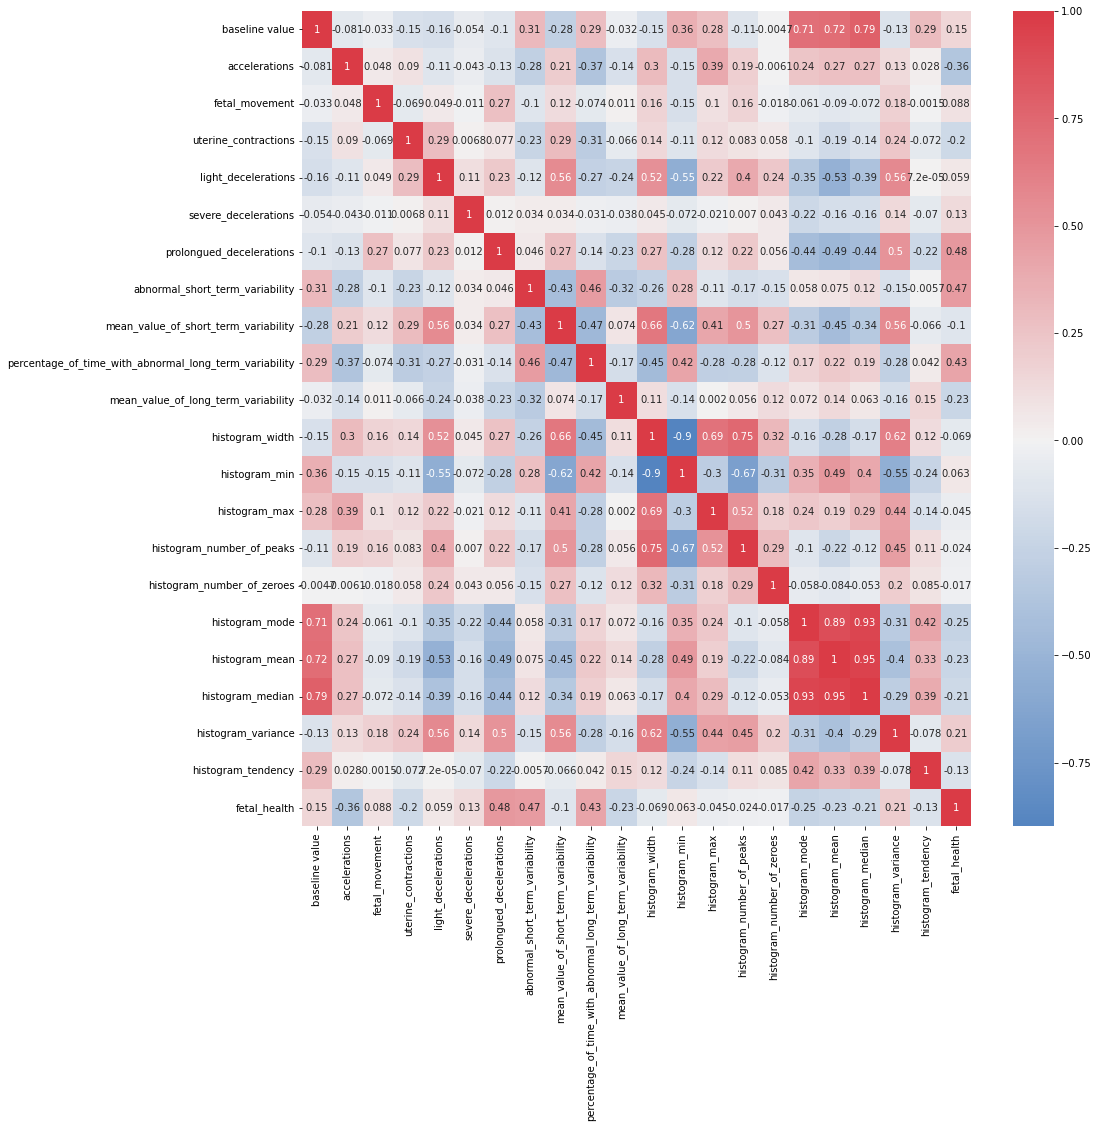

In [117]:
#correlation matrix
correlation_matrix= df.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, as_cmap=True)

sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0)

The correlation matrix shows that the features with large correlation with the fetal health state are: accelerations, prolongued decelartions, abnormal short term variability, percentage of time with abnormal long term variability, and mean value of long term variability.

We have to investigate these features more.

### Accelerations Versus Fetal Movement by Fetal Health

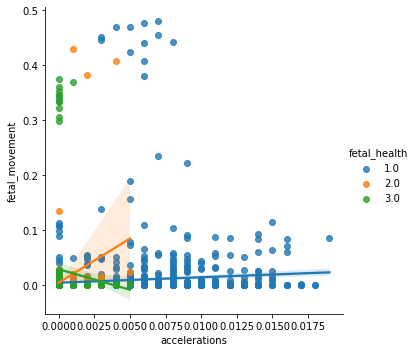

In [118]:
sns.lmplot(data =df,x="accelerations",y="fetal_movement", hue="fetal_health")
plt.show()

### Prolongued Decelerations Versus Fetal Movement by Fetal Health

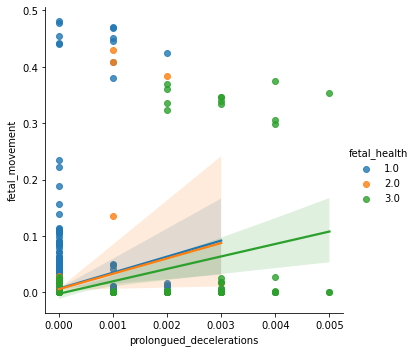

In [119]:
sns.lmplot(data =df,x="prolongued_decelerations",y="fetal_movement", hue="fetal_health")
plt.show()

### Abnormal Short Term Variability Versus Fetal Movement by Fetal Health

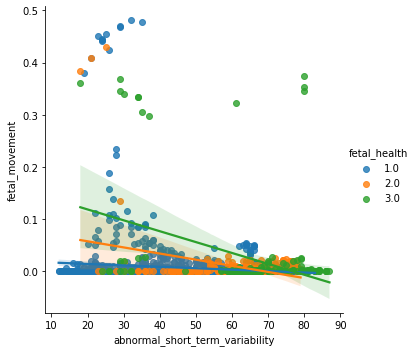

In [120]:
sns.lmplot(data =df,x="abnormal_short_term_variability",y="fetal_movement", hue="fetal_health")
plt.show()

### Mean Value of Long Term Variability Versus Fetal Movement by Fetal Health

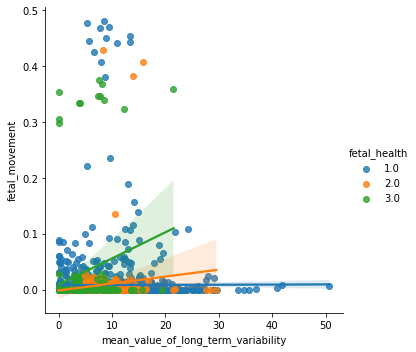

In [121]:
sns.lmplot(data =df,x="mean_value_of_long_term_variability",y="fetal_movement", hue="fetal_health")
plt.show()

It is shown in the previous figures that there are outliers. Let's investigate them.

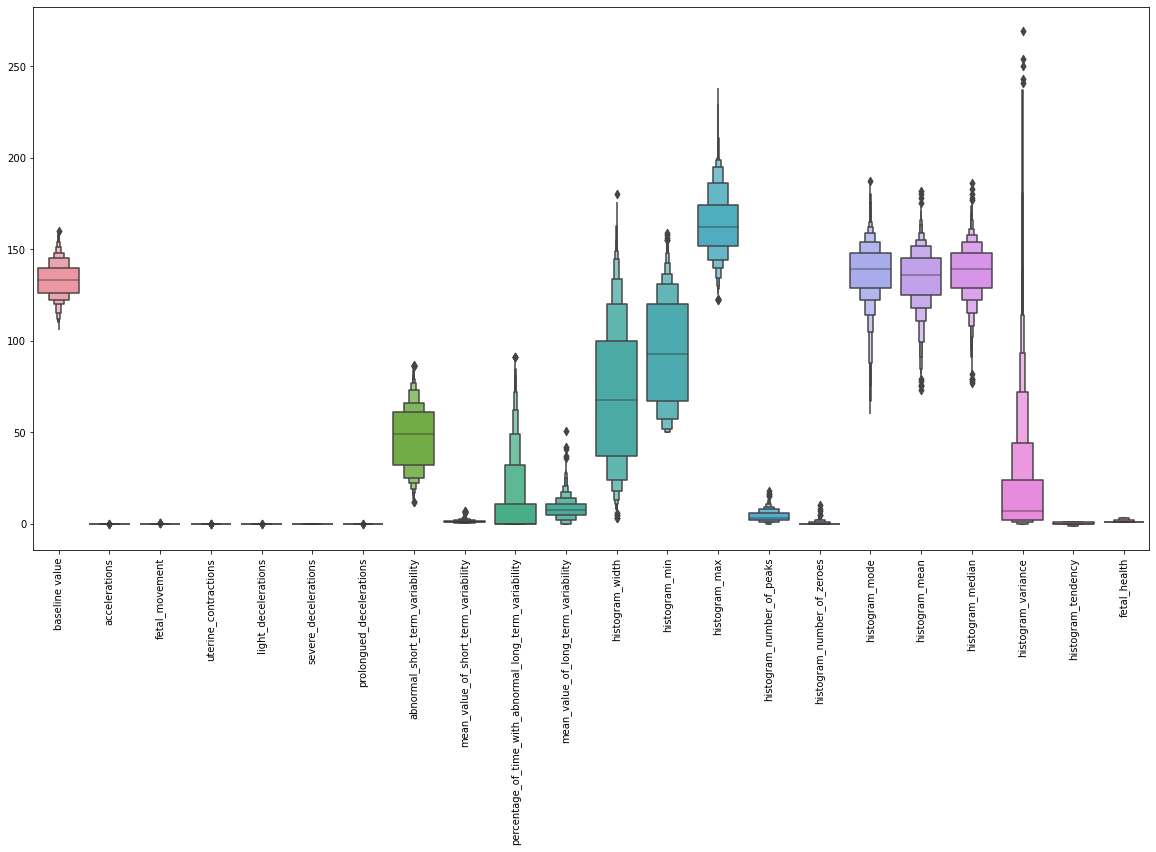

In [122]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = df)
plt.xticks(rotation=90)
plt.show()

It can be seen from the above figure that there are outliers in the dataset. However, removing them may result in overfitting. Also, the outliers are not a result of human error. However, they are a result of real values obtained by CTG. So, it is not a good idea to remove them.

Further data investigation:

<AxesSubplot:xlabel='fetal_health', ylabel='uterine_contractions'>

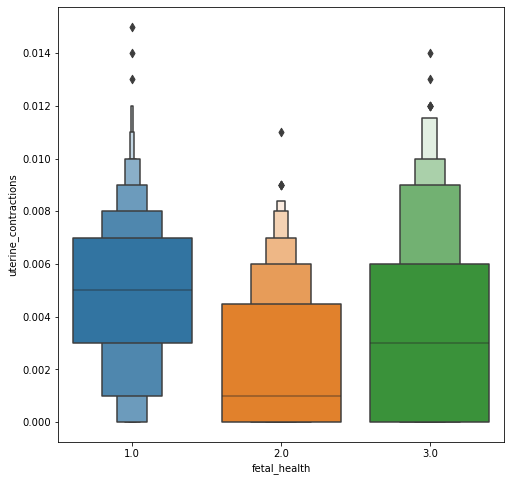

In [123]:
#uterine contractions and fetal helth boxplot

figure= plt.figure(figsize=(8,8))

sns.boxenplot(x='fetal_health', y='uterine_contractions', data=df)

Note: 1: normal, 2: suspect, 3: pathological

From the boxplot above, we can conclude that:
- The average of uterine contractions for a normal fetal is 0.005.
- The average of uterine contractions for a suspect fetal is 0.001.
- The average of uterine contractions for a pathological fetal is 0.003.

C:\Users\ralna\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


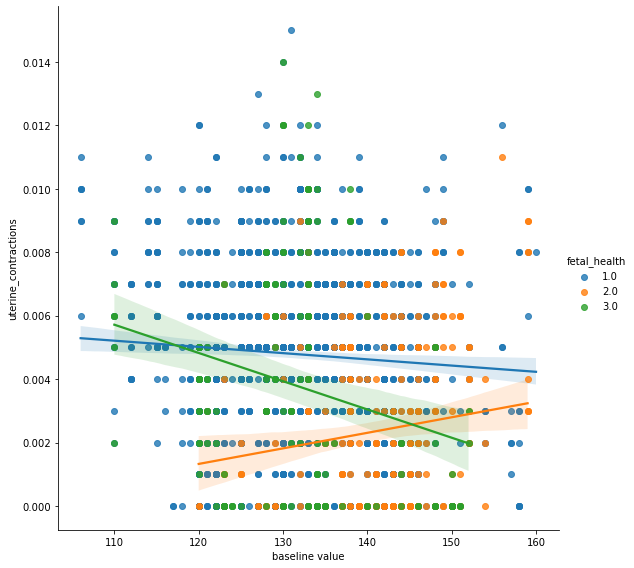

In [124]:
#Baseline fetal heart rate and uterine contractions
sns.lmplot(x='baseline value', y='uterine_contractions', data=df,hue='fetal_health',size=8)

The figure above represents a regression relationship.


1- For the normal fetal, the Baseline Fetal Health Rate increases while the uterine contractions are between approximately 0.006 and 0.004.

2- For the suspect fetal, the Baseline Fetal Health Rate increases while the uterine contractions increase to approximately 0.0036.


3- For the pathological fetal, the Baseline Fetal Health Rate increases while the uterine contractions decrease to approximately 0.002.


C:\Users\ralna\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


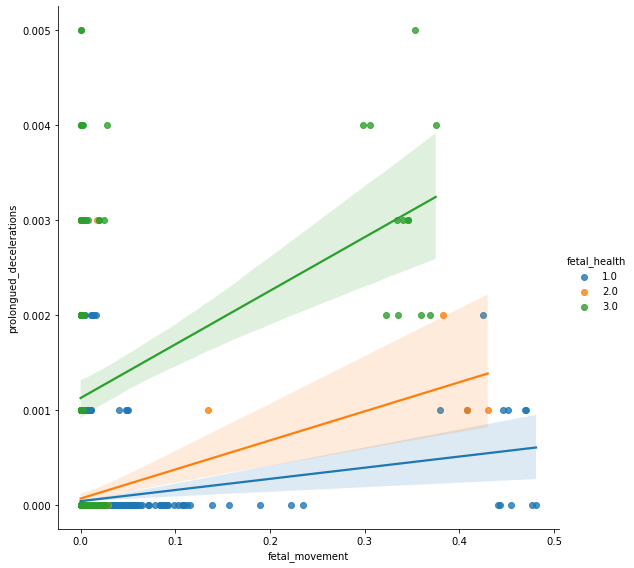

In [125]:
#how does the prolongued decelerations per second
#and fetal movement relate to the fetal's health?

sns.lmplot(x='fetal_movement', y='prolongued_decelerations', data=df,hue='fetal_health',size=8)

The figure above shows a clear difference between each type of fetal health.

- For the normal fetal, as the fetal movement increases to about 0.5, the prolongued movement increases to approximately 0.001.

- For the suspect fetal, as the fetal movement increases to about 0.4, the prolongued movement increases to approximately 0.004.

- For the pathological fetal, as the fetal movement increases to about 0.36, the prolongued movement increases to approximately 0.0032.

C:\Users\ralna\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


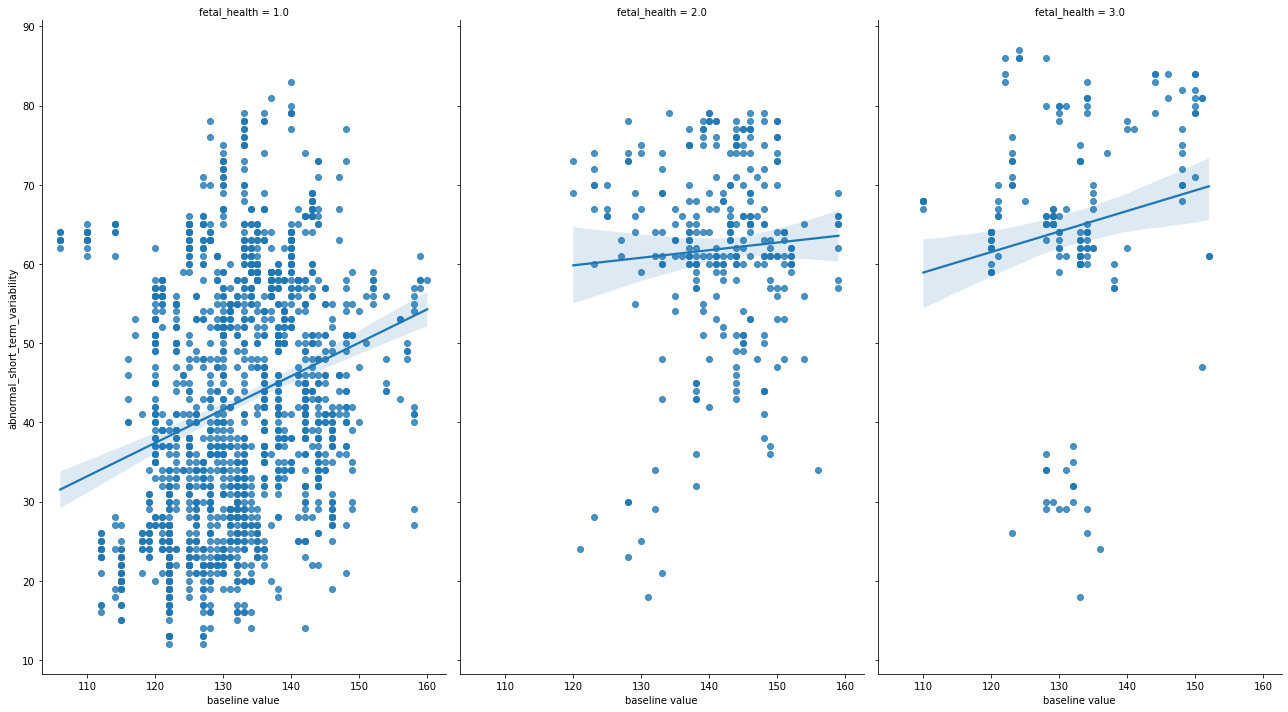

In [126]:
#abnormal short term variation and Baseline Fetal Health Rate affect on fetal health

sns.lmplot(x='baseline value',y='abnormal_short_term_variability',data=df,col='fetal_health',palette='coolwarm', aspect=0.6,size=10)

The above figure indicates the following:
- For the normal fetal, the Baseline Heart Rate increases from approximately 110 to 160 while the abnormal short term variation of the heart rate started from about 32 to 55.


- For the suspect fetal, the Baseline Heart Rate ranges from 120 to 160 while the abnormal short term variation of the heart rate started from approximately 60 to 64.


- For the pathological fetal, the Baseline Heart Rate ranges from 120 to 160 while the abnormal short term variation of the heart rate started from approximately 58 to 70.

C:\Users\ralna\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


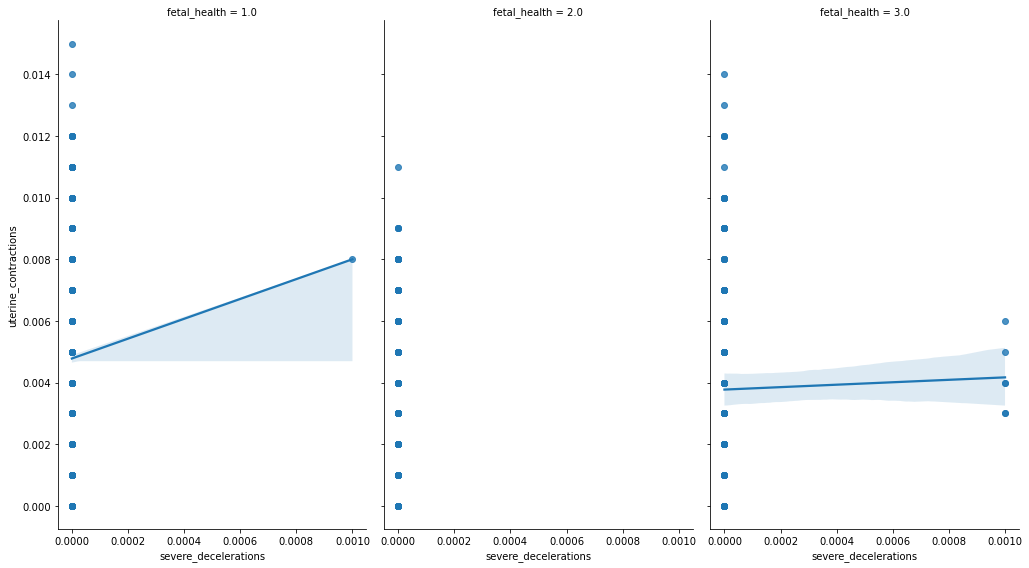

In [127]:
#relationship between severe decelerations and uterine contractions for each health state

sns.lmplot(x='severe_decelerations',y='uterine_contractions',data=df,col='fetal_health',palette='coolwarm',
          aspect=0.6,size=8)

The above figure implies that if severe decelerations increase in normal fetal state, the uterine contractions will have values ranging from 0.005 to 0.008 approximately. However, in the pathological type, if severe decelerations increase, the uterine contractions do not exceed 0.005.

C:\Users\ralna\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


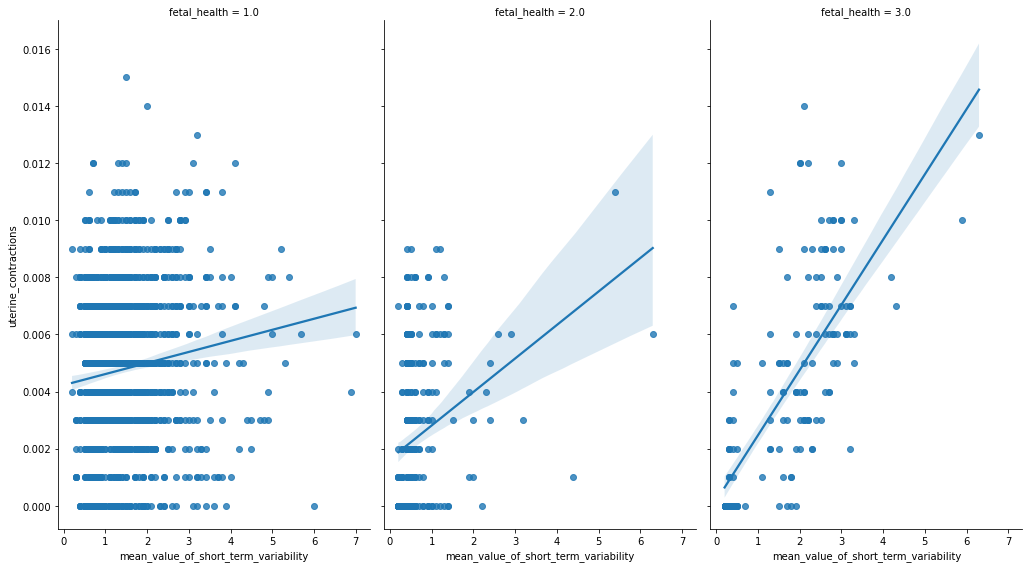

In [128]:
#how the mean value of short term variability affect the fetal's health in term of uterine contractions

sns.lmplot(x='mean_value_of_short_term_variability',y='uterine_contractions',data=df,col='fetal_health',palette='coolwarm',
          aspect=0.6,size=8)

From the above figure, we can conclude:
- For the normal fetal health, as the mean value of short term variability reaches 7, uterine contractions increase from approximately 0.0041 to 0.0063.


- For the suspect fetal health, as the mean value of short term variability reaches 6.5, uterine contractions increase from approximately 0.002 to 0.009.

- For the pathological fetal health, as the mean value of short term variability reaches 6.4, uterine contractions increase from 0.001 to 0.0145. 

## Model Selection and Buiding

In [129]:
X=df.drop(['fetal_health'],axis=1)
y=df['fetal_health']

In [130]:
#features standard scaler
column_names = list(X.columns)
standard_scaler = preprocessing.StandardScaler()
X_df= standard_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=column_names)   
X_df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
count,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,...,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03
mean,4.161509e-16,-1.803982e-16,-1.958452e-15,-2.625683e-15,-5.127706e-15,7.254767e-16,4.324961e-15,2.687304e-16,-2.481552e-16,2.291362e-15,...,8.564279e-17,-6.120326e-17,-4.047144e-17,2.408965e-16,8.397171e-17,6.141215e-17,-4.183964e-16,1.404751e-16,-3.634597e-17,5.783500e-16
std,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,...,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00
min,-2.775197e+00,-8.223883e-01,-2.032096e-01,-1.482465e+00,-6.384375e-01,-5.747560e-02,-2.687543e-01,-2.035639e+00,-1.282833e+00,-5.353613e-01,...,-1.731757e+00,-1.474609e+00,-2.342558e+00,-1.379664e+00,-4.584438e-01,-4.729191e+00,-3.951945e+00,-4.223849e+00,-6.492081e-01,-2.162031e+00
25%,-7.423728e-01,-8.223883e-01,-2.032096e-01,-8.034341e-01,-6.384375e-01,-5.747560e-02,-2.687543e-01,-8.720881e-01,-7.166031e-01,-5.353613e-01,...,-8.587648e-01,-8.993760e-01,-6.703135e-01,-7.013968e-01,-4.584438e-01,-5.160773e-01,-6.164580e-01,-6.285137e-01,-5.801731e-01,-5.245255e-01
50%,-3.088439e-02,-3.048813e-01,-2.032096e-01,-1.244037e-01,-6.384375e-01,-5.747560e-02,-2.687543e-01,1.169297e-01,-1.503732e-01,-5.353613e-01,...,-7.563980e-02,-1.960840e-02,-1.128988e-01,-3.622634e-01,-4.584438e-01,9.451891e-02,8.912573e-02,6.289690e-02,-4.075856e-01,-5.245255e-01
75%,6.806040e-01,7.301328e-01,-1.389076e-01,8.941419e-01,3.752430e-01,-5.747560e-02,-2.687543e-01,8.150599e-01,4.158567e-01,6.270688e-02,...,7.588376e-01,8.939964e-01,5.559989e-01,6.551369e-01,-4.584438e-01,6.440555e-01,6.664215e-01,6.851664e-01,1.792117e-01,1.112980e+00
max,2.713428e+00,4.093929e+00,1.010654e+01,3.610264e+00,4.429965e+00,1.739869e+01,8.208570e+00,2.327675e+00,6.417893e+00,4.412293e+00,...,2.812936e+00,2.213648e+00,4.123453e+00,4.724738e+00,1.370800e+01,3.025381e+00,3.039749e+00,3.312527e+00,8.635997e+00,1.112980e+00


Visualizing the features scaled

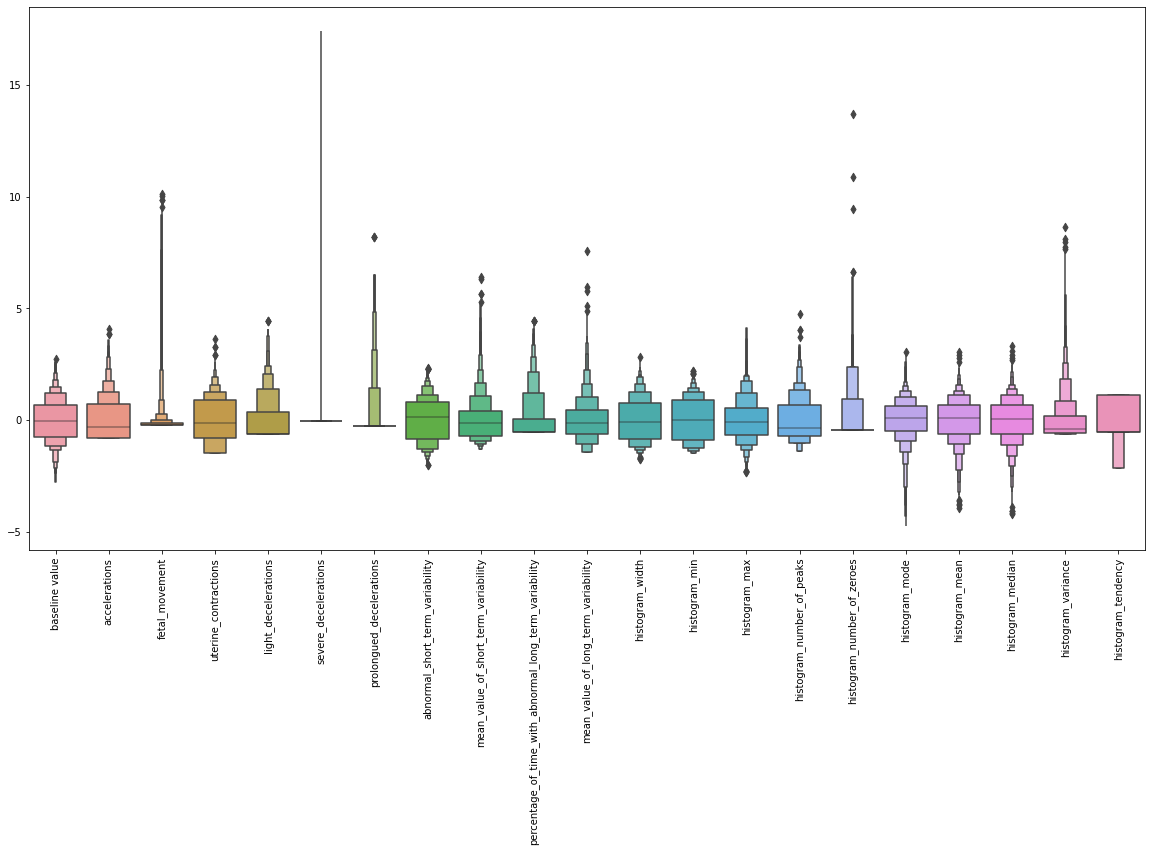

In [131]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df)
plt.xticks(rotation=90)

plt.show()

In [132]:
#split data into testing and training
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=42)

Model Selection

I have found this method while researching for the project. It is a short way to fit and predict various models and evaluate them.

In [133]:
#create a pipeline for each model
pipeline_LR=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_DTC=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_RFC=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_SVC=Pipeline([('sv_classifier',SVC())])

#create a list of pipelines
pipelines = [pipeline_LR, pipeline_DTC, pipeline_RFC, pipeline_SVC]

#create a dictionary for pipelines
pipeline_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}

#fit the pipelines using a loop
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], cv_score.mean()))

Logistic Regression: 0.897170 
Decision Tree: 0.916683 
RandomForest: 0.940205 
SVC: 0.906594 


Based on the results obtained, the random forest method is the most accuarte.

Random forest using GridSearchCv and test it on the test set:

In [134]:
pred_rfc = pipeline_RFC.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)

print(accuracy)

0.9435736677115988


I still did not finish the project. The following steps include using GridSearchCv to get the best hyperparameters.
Then, I will find the evaluation scores values.